# Data gathering

### Sources of Data

A vast amount of historical data can be found in files such as:

- MS Word documents
- Emails
- Spreadsheets
- MS PowerPoints
- PDFs
- HTML
- and plaintext files

Public and Private Archives

CSV, JSON, and XML files use plaintext, a common format, and are compatible with a wide range of applications

The Web can be mined for data using a web scraping application

The IoT uses sensors create data

Sensors in smartphones, cars, airplanes, street lamps, and home appliances capture raw data

### Open Data and Private Data

1. Open Data
> The Open Knowledge Foundation describes Open Data as “any content, information or data that people are free to use, reuse, and redistribute without any legal,
technological, or social restriction.”

2. Private Data
> Data related to an expectation of privacy and regulated by a particular country/government


### Structured and Unstructured Data

1. Structured Data
> Data entered and maintained in fixed fields within a file or record Easily entered, classified, queried, and analyzed Relational databases or spreadsheets

2. Unstructured Data Lacks organization
> Raw data Photo contents, audio, video, web pages, blogs, books, journals, white papers, PowerPoint presentations, articles, email, wikis, word processing
documents, and text in general

### Example of gathering image data using webcam

Note: Run this snippet using local jupyter notebook

In [17]:
import cv2

key = cv2. waitKey(1)
webcam = cv2.VideoCapture(0)
while True:
 try:
     check, frame = webcam.read()
     print(check) #prints true as long as the webcam is running
     print(frame) #prints matrix values of each framecd
     cv2.imshow("Capturing", frame)
     key = cv2.waitKey(1)
     if key == ord('s'):
         cv2.imwrite(filename='saved_img.jpg', img=frame)
         webcam.release()
         img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
         img_new = cv2.imshow("Captured Image", img_new)
         cv2.waitKey(1650)
         cv2.destroyAllWindows()
         print("Processing image...")
         img_ = cv2.imread('saved_img.jpg', cv2.IMREAD_ANYCOLOR)
         print("Converting RGB image to grayscale...")
         gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
         print("Converted RGB image to grayscale...")
         print("Resizing image to 28x28 scale...")
         img_ = cv2.resize(gray,(28,28))
         print("Resized...")
         img_resized = cv2.imwrite(filename='saved_img-final.jpg', img=img_)
         print("Image saved!")
         break
     elif key == ord('q'):
         print("Turning off camera.")
         webcam.release()
         print("Camera off.")
         print("Program ended.")
         cv2.destroyAllWindows()
         break

 except(KeyboardInterrupt):
     print("Turning off camera.")
     webcam.release()
     print("Camera off.")
     print("Program ended.")
     cv2.destroyAllWindows()
     break

False
None


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:973: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


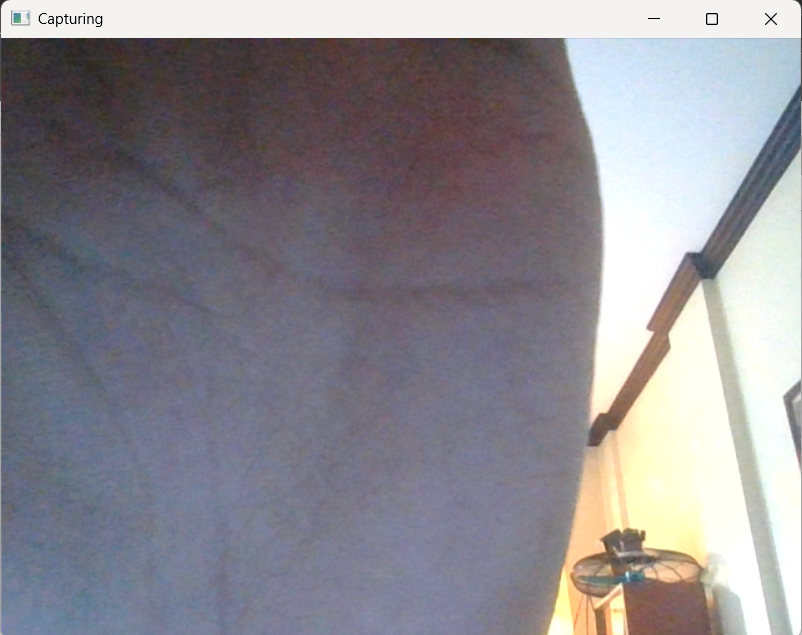

### Example of gathering voice data using microphone

Note: Run the snippet of codes using local jupyter notebook

In [19]:
!pip3 install sounddevice

In [21]:
!pip3 install wavio

In [23]:
!pip3 install scipy

In [25]:
#pip install pipwin
#pipwin install pyaudio
# I dowloaded these modules in Anaconda Prompt since apt-get install libportaudio2 is not usable in Jupyter
import pyaudio

ModuleNotFoundError: No module named 'pyaudio'

In [41]:
# import required libraries
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

# Sampling frequency
freq = 44100

# Recording duration
duration = 30

# Start recorder with the given values
# of duration and sample frequency
print("Recording...") #I added i new line so that I will see if it's starts recording
recording = sd.rec(int(duration * freq),
 samplerate=freq, channels=1) # My pc didn't have 2 channels so I only made it 1 
print("Recording complete.") # So that I know it stopped

# Record audio for the given number of seconds
sd.wait()

# This will convert the NumPy array to an audio
# file with the given sampling frequency
write("recording0.wav", freq, recording)

# Convert the NumPy array to audio file
wv.write("recording1.wav", recording, freq, sampwidth=2)

Recording...
Recording complete.


In [43]:
from IPython.display import Audio #I searched this so that I could play the recording

# Play the recorded audio
Audio("recording0.wav")

### Web Scraping

__Web scraping, web harvesting, or web data extraction__ is data scraping used for extracting data from websites. The web scraping software may directly access the World
Wide Web using the Hypertext Transfer Protocol or a web browser. While web scraping can be done manually by a software user, the term typically refers to automated
processes implemented using a bot or web crawler. It is a form of copying in which specific data is gathered and copied from the web, typically into a central local database or
spreadsheet, for later retrieval or analysis.


Reference: [link text](https://en.wikipedia.org/wiki/Web_scraping)

### Image Scraping using BeautifulSoup and Request

In [1]:
!pip install bs4

In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [47]:
import requests
from bs4 import BeautifulSoup

def getdata(url):
 r = requests.get(url)
 return r.text

htmldata = getdata("https://www.google.com/")
soup = BeautifulSoup(htmldata, 'html.parser')
for item in soup.find_all('img'):
 print(item['src'])


/images/branding/googlelogo/1x/googlelogo_white_background_color_272x92dp.png


## Image Scraping using Selenium

Note: Run the snippet of code using local jupyter notebook

In [32]:
!pip install selenium
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')


from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import requests
import shutil
import os
import getpass
import urllib.request
import io
import time
from PIL import Image
user = getpass.getuser()
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome()
def scroll_to_end(driver):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)#sleep_between_interactions

    
def getImageUrls(name,totalImgs,driver):
    search_url = "https://www.google.com/search?q=cat&tbm=isch&ved=2ahUKEwjNn_Gn7YyFAxU3yDgGHQYQCesQ2-cCegQIABAA&oq=cat&gs_lp=EgNpbWciA2NhdDINEAAYgAQYigUYQxixAzIIEAAYgAQYsQMyDhAAGIAEGIoFGLEDGIMBMggQABiABBixAzILEAAYgAQYsQMYgwEyCBAAGIAEGLEDMggQABiABBixAzIFEAAYgAQyCBAAGIAEGLEDMggQABiABBixA0iqGVCADlilF3AAeACQAQCYAVegAc0CqgEBNLgBA8gBAPgBAYoCC2d3cy13aXotaW1nwgIKEAAYgAQYigUYQ4gGAQ&sclient=img&ei=WBYAZs2TMLeQ4-EPhqCk2A4&bih=568&biw=1251&hl=en"
    driver.get(search_url)
    img_urls = set()
    img_count = 0
    results_start = 0
    
    while(img_count+results_start<totalImgs): #Extract actual images now
        scroll_to_end(driver)
        totalResults = driver.find_elements(By.CLASS_NAME,"Q4LuWd")       
        print('total results:', len(totalResults))
        print(f"Found: {totalResults} search results. Extracting links from{results_start}:{totalResults}")
        for img in totalResults[results_start:totalImgs]:
            img.click()
            time.sleep(5)
            image = driver.find_element(By.CLASS_NAME,'iPVvYb')
            img_urls.add(image.get_attribute('src'))
            print(img_urls)
            img_count=len(img_urls)
            print(img_count)
                    
    return img_urls

def downloadImages(folder_path,file_name,url):
    try:
        image_content = requests.get(url).content
    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")
    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")
        
def saveInDestFolder(searchNames,destDir,totalImgs,driver):
    for name in list(searchNames):
        path=os.path.join(destDir,name)
        if not os.path.isdir(path):
            os.mkdir(path)
        print('Current Path',path)
        totalLinks=getImageUrls(name,totalImgs,driver)
        print('totalLinks',totalLinks)
        
    if totalLinks is None:
        print('images not found for :',name)
        
    else:
        for i, link in enumerate(totalLinks):
            file_name = f"{i:150}.jpg"
            downloadImages(path,file_name,link)
            
searchNames=['cat']
destDir='C:/Users/micki/MICKI 22S3'
totalImgs=5

saveInDestFolder(searchNames,destDir,totalImgs,driver)

Current Path C:/Users/micki/MICKI 22S3\cat
total results: 0
Found: [] search results. Extracting links from0:[]
total results: 0
Found: [] search results. Extracting links from0:[]
total results: 0
Found: [] search results. Extracting links from0:[]
total results: 0
Found: [] search results. Extracting links from0:[]
total results: 0
Found: [] search results. Extracting links from0:[]
total results: 0
Found: [] search results. Extracting links from0:[]
total results: 0
Found: [] search results. Extracting links from0:[]
total results: 0
Found: [] search results. Extracting links from0:[]
total results: 0
Found: [] search results. Extracting links from0:[]
total results: 0
Found: [] search results. Extracting links from0:[]
total results: 0
Found: [] search results. Extracting links from0:[]
total results: 0
Found: [] search results. Extracting links from0:[]
total results: 0
Found: [] search results. Extracting links from0:[]
total results: 0
Found: [] search results. Extracting links 

InvalidSessionIdException: Message: invalid session id: session deleted as the browser has closed the connection
from disconnected: not connected to DevTools
  (Session info: chrome=135.0.7049.85)
Stacktrace:
	GetHandleVerifier [0x00007FF60CA85335+78597]
	GetHandleVerifier [0x00007FF60CA85390+78688]
	(No symbol) [0x00007FF60C8391AA]
	(No symbol) [0x00007FF60C824EF5]
	(No symbol) [0x00007FF60C849F04]
	(No symbol) [0x00007FF60C8BED0F]
	(No symbol) [0x00007FF60C8DEBB2]
	(No symbol) [0x00007FF60C8B6EC3]
	(No symbol) [0x00007FF60C8803F8]
	(No symbol) [0x00007FF60C881163]
	GetHandleVerifier [0x00007FF60CD2EEED+2870973]
	GetHandleVerifier [0x00007FF60CD29698+2848360]
	GetHandleVerifier [0x00007FF60CD46973+2967875]
	GetHandleVerifier [0x00007FF60CAA017A+188746]
	GetHandleVerifier [0x00007FF60CAA845F+222255]
	GetHandleVerifier [0x00007FF60CA8D2B4+111236]
	GetHandleVerifier [0x00007FF60CA8D462+111666]
	GetHandleVerifier [0x00007FF60CA73589+5465]
	BaseThreadInitThunk [0x00007FFE8D8EE8D7+23]
	RtlUserThreadStart [0x00007FFE8E8914FC+44]


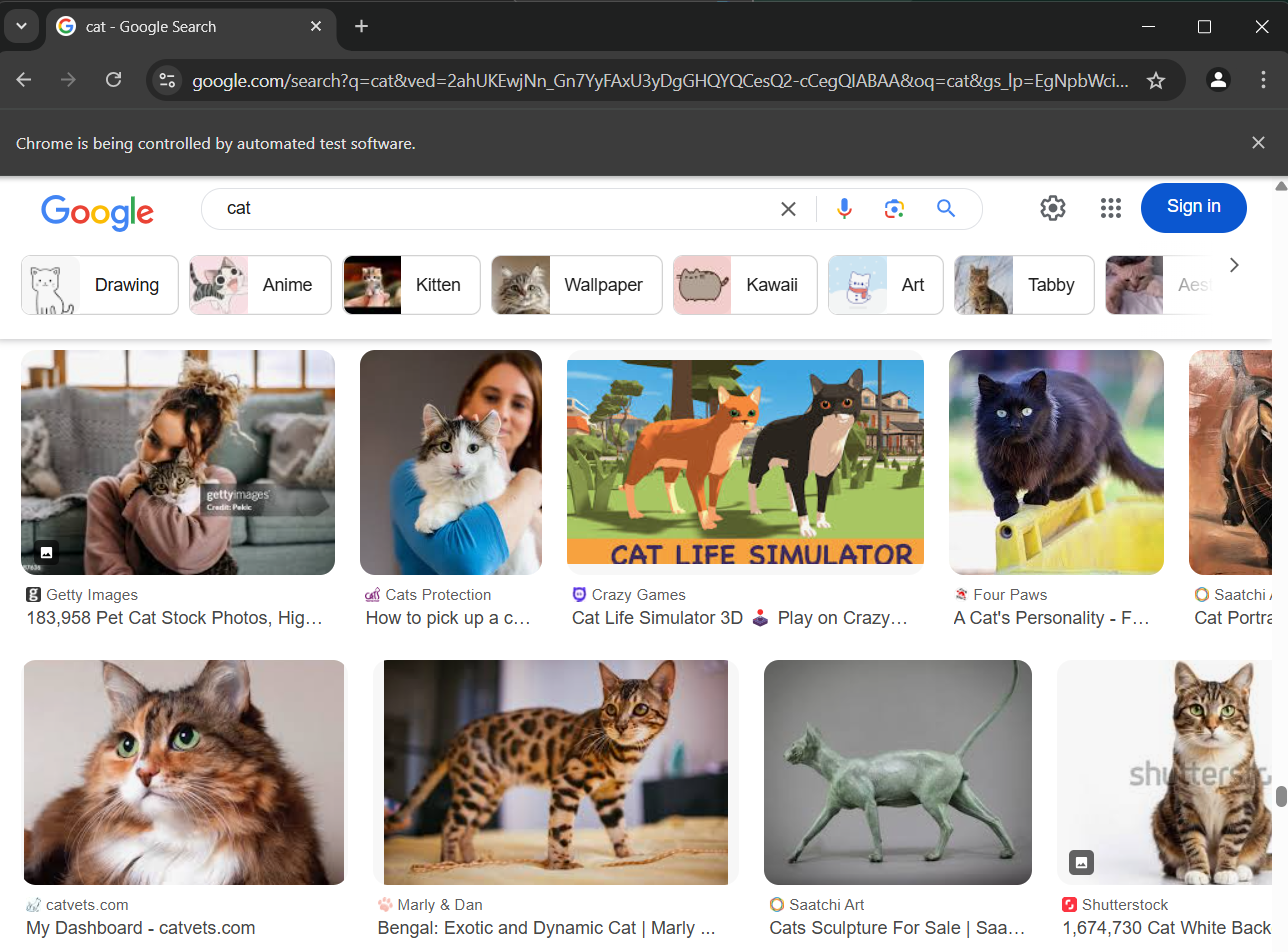

#### Web Scraping of Movies Information using BeautifulSoup

We want to analyze the distributions of IMDB and Metacritic movie ratings to see if we find anything interesting. To do this, weʼll first scrape data for over 2000 movies.

Identifying the URL structure

Identifying the URL structure
In the image above, you can see that the URL has several parameters after the question mark:
- release_date — Shows only the movies released in a specific year.
- sort — Sorts the movies on the page. sort=num_votes,desc translates to sort by number of votes in a descending order.
- page — Specifies the page number.
- ref_ — Takes us to the the next or the previous page. The reference is the page we are currently on. adv_nxt and adv_prv are two possible values. They translate to
advance to the next page, and advance to the previous page, respectivel

In [88]:
from requests import get
url = 'https://www.imdb.com/search/title/?release_date=2017-01-01,2017-12-31&sort=num_votes,desc&ref_=adv_prv'
# mimic a real browser and avoid being blocked by the server
agent = {"User-Agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'}
response = get(url, headers = agent)
print(response)
print(response.text[:500])

<Response [200]>
<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
             


Understanding the HTML structure of a single page

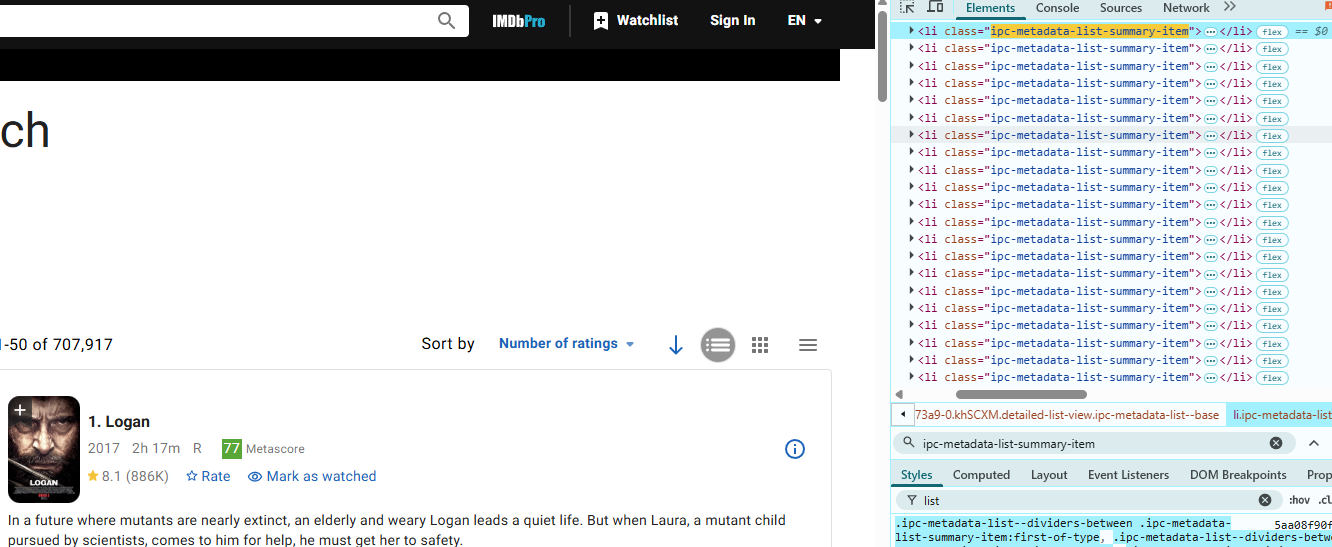

Using BeautifulSoup to parse the HTML content

To parse our HTML document and extract the 50 div containers, weʼll use a Python module called BeautifulSoup, the most common web scraping module for Python.

In the following code cell we will:

- Import the BeautifulSoup class creator from the package bs4.
- Parse response.text by creating a BeautifulSoup object, and assign this object to html_soup. The 'html.parser' argument indicates that we want to do the parsing using
Pythonʼs built-in HTML parser.

In [90]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')
headers = {'Accept-Language': 'en-US,en;q=0.8'}
type(soup)

bs4.BeautifulSoup

Before extracting the 50 div containers, we need to figure out what distinguishes them from other div elements on that page. Often, the distinctive mark resides in the class
attribute. If you inspect the HTML lines of the containers of interest, youʼll notice that the class attribute has two values: lister-item and mode-advanced. This combination is
unique to these div containers. We can see thatʼs true by doing a quick search (Ctrl + F). We have 50 such containers, so we expect to see only 50 matches:


In [96]:
movie_containers = soup.find_all('li', class_= 'ipc-metadata-list-summary-item')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
25


find_all() returned a ResultSet object which is a list containing all the 50 divs we are interested in.

Now weʼll select only the first container, and extract, by turn, each item of interest:

The name of the movie
The year of release.
The IMDB rating.
The Metascore.
The number of votes

Extracting the data for a single movie

We can access the first container, which contains information about a single movie, by using list notation on movie_containers.

In [98]:
first_movie = movie_containers[0]

In [100]:
first_name = first_movie.h3.text
first_name[3:]

'Logan'

The year of the movieʼs release

In [134]:
first_year = movie_containers[0].find('span', class_ = "sc-2bbfc9e9-7 jttFlJ dli-title-metadata-item")
print(first_year)

<span class="sc-2bbfc9e9-7 jttFlJ dli-title-metadata-item">2017</span>


In [136]:
first_year = first_year.text
print(first_year)

2017


The IMDB rating

In [139]:
first_imdb = movie_containers[0].find('span', class_ = "ipc-rating-star--rating")
first_imdb.text[:3]

'8.1'

The Metascore

In [142]:
first_mscore = movie_containers[0].find('span', class_ = 'sc-b0901df4-0 bXIOoL metacritic-score-box')
first_mscore = first_mscore.text
print(first_mscore)

77


The number of votes

In [145]:
first_votes = movie_containers[0].find('span', class_ = 'ipc-rating-star--voteCount')
first_votes.text[2:-1]

'886K'

The script

In [148]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:
 names.append(container.find('h3', class_ = "ipc-title__text").text[3:])
 # print(container.find('h3', class_ = "ipc-title__text").text[3:])
 years.append(container.find('span', class_ = "sc-2bbfc9e9-7 jttFlJ dli-title-metadata-item").text)
 # print(container.find('span', class_ = "sc-b0691f29-8 ilsLEX dli-title-metadata-item").text)
 imdb_ratings.append(container.find('span', class_="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating").text[:3])
 # print(container.find('span', class_ = "ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--i
 rate = container.find('span', class_='sc-b0901df4-0 bcQdDJ metacritic-score-box')
 if rate:
     metascores.append(rate.text)
 else:
     metascores.append(0)
 # print(container.find('span', class_ = 'ipc-rating-star--voteCount').text[2:-1])
 votes.append(container.find('span', class_ = 'ipc-rating-star--voteCount').text[2:-1])

print(len(names))
print(len(years))
print(len(imdb_ratings))
print(len(metascores))
print(len(votes))

25
25
25
25
25


In [150]:
import pandas as pd
df = pd.DataFrame({'movie':names,
                  'year' : years,
                  'IMDb' : imdb_ratings,
                  'metascore' : metascores,
                  'votes' : votes

})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   movie      25 non-null     object
 1   year       25 non-null     object
 2   IMDb       25 non-null     object
 3   metascore  25 non-null     int64 
 4   votes      25 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


In [152]:
df.to_csv('Movies.csv', index = False)

In [154]:
df = pd.read_csv('Movies.csv')
df.head()

movie  year  IMDb  metascore votes
0                           Logan  2017   8.1          0  886K
1                  Thor: Ragnarok  2017   7.9          0  851K
2  Guardians of the Galaxy Vol. 2  2017   7.6          0  791K
3                         Dunkirk  2017   7.8          0  770K
4                         Get Out  2017   7.8          0  755K

In [156]:
df.tail()

movie       year  IMDb  metascore  \
20                                         Ozark  2017–2022   8.5          0   
21                                    Mindhunter  2017–2019   8.6          0   
22   Pirates of the Caribbean: Salazar's Revenge       2017   6.5          0   
23                            Kong: Skull Island       2017   6.7          0   
24                                     Lady Bird       2017   7.4          0   

   votes  
20  368K  
21  365K  
22  364K  
23  362K  
24  350K

The script for multiple pages

In [203]:
import time
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import clear_output

# Set up years and pages to scrape
years_url = ['2017', '2018', '2019', '2020']
pages = ['1', '2', '3', '4', '5']

# Data containers
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Headers to avoid bot detection
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/123.0.0.0 Safari/537.36"
}

# Start scraping
start_time = time.time()
requests_count = 0

for year in years_url:
    for page in pages:
        url = f'https://www.imdb.com/search/title/?release_date={year}-01-01,{year}-12-31&sort=num_votes,desc&page={page}'

        response = get(url, headers=headers)
        time.sleep(2)  # Pause between requests

        requests_count += 1
        elapsed_time = time.time() - start_time
        print(f'Request {requests_count}; Frequency: {requests_count/elapsed_time:.2f} requests/s')
        clear_output(wait=True)

        if response.status_code != 200:
            print(f'⚠️ Request {requests_count} failed with status code {response.status_code}')
            break

        soup = BeautifulSoup(response.text, 'html.parser')
        movie_containers = soup.find_all('div', class_='lister-item mode-advanced')

        for container in movie_containers:
            # Only process if Metascore is present
            m_score_tag = container.find('span', class_='metascore')
            if m_score_tag:
                # Movie name
                name = container.h3.a.text
                names.append(name)

                # Year (cleaned)
                year_text = container.h3.find('span', class_='lister-item-year').text
                years.append(year_text.strip())

                # IMDb rating
                imdb_tag = container.find('div', class_='inline-block ratings-imdb-rating')
                imdb = imdb_tag['data-value'] if imdb_tag else 'N/A'
                imdb_ratings.append(imdb)

                # Metascore
                metascores.append(m_score_tag.text.strip())

                # Votes
                vote_tag = container.find_all('span', attrs={'name': 'nv'})
                vote = vote_tag[0].text if vote_tag else '0'
                votes.append(vote)

# ✅ Create and display the DataFrame
print("✅ Scraping complete. Creating DataFrame...")

movie_ratings = pd.DataFrame({
    'movie': names,
    'year': years,
    'imdb': imdb_ratings,
    'metascore': metascores,
    'votes': votes
})

print("\n🎬 Top 5 Movies:")
print(movie_ratings.head())

# Optional: Save to CSV
movie_ratings.to_csv('imdb_movies.csv', index=False)
print("\n📁 Data saved to imdb_movies.csv")

✅ Scraping complete. Creating DataFrame...

🎬 Top 5 Movies:
Empty DataFrame
Columns: [movie, year, imdb, metascore, votes]
Index: []

📁 Data saved to imdb_movies.csv


In [201]:
movie_ratings.head(10)

Empty DataFrame
Columns: [movie, year, imdb, metascore, votes]
Index: []

In [183]:
movie_ratings.dtypes

Unnamed: 0      int64
movie          object
year            int64
imdb          float64
metascore       int64
votes          object
dtype: object

In [187]:
movie_ratings['year'].unique()

array([2017, 2018, 2019, 2020], dtype=int64)

In [191]:
movie_ratings.head()

Unnamed: 0                           movie  year  imdb  metascore votes
0           0                           Logan  2017   8.1         77  827K
1           1                  Thor: Ragnarok  2017   7.9         74  813K
2           2  Guardians of the Galaxy Vol. 2  2017   7.6         67  756K
3           3                         Dunkirk  2017   7.8         94  736K
4           4          Spider-Man: Homecoming  2017   7.4         73  716K